# Scraping hockey-reference.com

In [1]:
import urllib.request
import pandas as pd
from bs4 import BeautifulSoup
from argparse import ArgumentParser
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Query the hockey-reference website for data and transform html into a readable table
html1 = urllib.request.urlopen("https://www.hockey-reference.com/leagues/NHL_2024_skaters.html#stats::points").read()
soup1 = BeautifulSoup(html1,"html.parser")

table1 = soup1.find_all('table')[0]
table_body1 = table1.find('tbody')
rows1 = table_body1.find_all('tr')

column_headers = ['Rk','Player','Age','Team','Pos','GP','G','A','PTS','+/-','PIM','EVG','PPG','SHG','GWG','EV','PP',
                  'SH','SOG','SPCT','TSA','TOI','ATOI','FOW','FOL','FO%','BL','HIT','TAKE','GIVE','Awards']

full_data = [[td1.getText() for td1 in rows1[i].find_all(['th','td'])]
            for i in range(len(rows1))]

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.DataFrame(full_data, columns=column_headers)
df.describe()

,Rk,Player,Age,Team,Pos,GP,G,A,PTS,+/-,PIM,EVG,PPG,SHG,GWG,EV,PP,SH,SOG,SPCT,TSA,TOI,ATOI,FOW,FOL,FO%,BL,HIT,TAKE,GIVE,Awards
count,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169
unique,1023,1022,24,35,16,84,51,71,99,79,104,39,22,8,14,46,35,8,245,197,397,1159,742,247,252,247,168,205,77,82,128
top,925,Anthony Beauvillier,25,2TM,D,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,60:00,11:17,0,0,,0,0,0,0,
freq,4,4,114,70,371,106,321,216,184,209,207,329,772,998,652,232,679,987,133,188,109,3,6,581,548,533,152,129,181,117,1017


In [5]:
# Cleaning up goalies
df = df[df.Pos != 'G']
df.head()

,Rk,Player,Age,Team,Pos,GP,G,A,PTS,+/-,PIM,EVG,PPG,SHG,GWG,EV,PP,SH,SOG,SPCT,TSA,TOI,ATOI,FOW,FOL,FO%,BL,HIT,TAKE,GIVE,Awards
0,1,Nikita Kucherov,30,TBL,RW,81,44,100,144,8,22,31,13,0,6,60,40,0,306,14.4,635,1755:10,21:40,2,2,50.0,35,45,62,96,"AS-1,Byng-22,Hart-2,Ross-1"
1,2,Nathan MacKinnon,28,COL,C,82,51,89,140,35,42,41,10,0,9,51,38,0,405,12.6,692,1870:46,22:49,607,707,46.2,69,55,42,82,"AS-1,Hart-1,Selke-37,Pearson-1"
2,3,Connor McDavid,27,EDM,C,76,32,100,132,35,30,24,7,1,5,63,37,0,263,12.2,452,1623:18,21:22,442,423,51.1,39,118,68,84,"AS-2,Byng-29,Hart-3,Selke-30"
3,4,Artemi Panarin,32,NYR,LW,82,49,71,120,18,24,38,11,0,5,37,33,1,303,16.2,651,1649:45,20:07,1,9,10.0,15,18,34,72,"AS-1,Byng-15,Hart-5"
4,5,David Pastrňák,27,BOS,RW,82,47,63,110,21,47,35,12,0,5,40,23,0,382,12.3,718,1634:14,19:56,8,16,33.3,19,70,54,98,"AS-2,Byng-49,Hart-8"


# Faceoffs

<AxesSubplot:xlabel='FOW', ylabel='Count'>

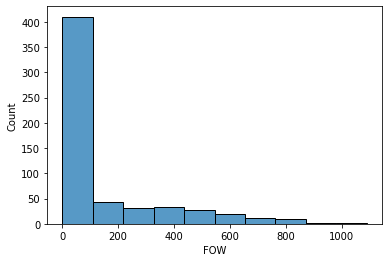

In [6]:
#Understanding distribution of FOW to arrive at a cut-off
df.FOW = pd.to_numeric(df.FOW)
sns.histplot(data=df[df.FOW != 0], x="FOW", bins=10)

<AxesSubplot:xlabel='FO%'>

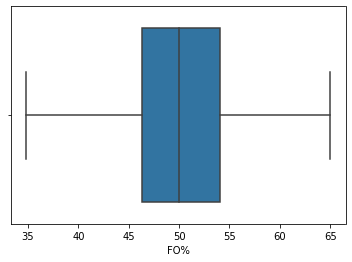

In [7]:
df['FO%'] = pd.to_numeric(df['FO%'])
fo_df = df[df.FOW>=100]
sns.boxplot(x="FO%", data=fo_df)

In [8]:
df[(df['FO%']>=55) & (df.FOW>=100)].sort_values(by='FO%', ascending=False)

,Rk,Player,Age,Team,Pos,GP,G,A,PTS,+/-,PIM,EVG,PPG,SHG,GWG,EV,PP,SH,SOG,SPCT,TSA,TOI,ATOI,FOW,FOL,FO%,BL,HIT,TAKE,GIVE,Awards
447,408,Michael McLeod,25,NJD,C,45,10,9,19,6,10,10,0,0,2,9,0,0,73,13.7,125,681:29,15:09,424.0,228,65.0,22,101,20,18,
521,476,Jeff Carter,39,PIT,C,72,11,4,15,-7,12,5,4,2,4,4,0,0,90,12.2,175,905:05,12:34,265.0,159,62.5,33,83,23,20,Byng-32
89,90,Jamie Benn,34,DAL,LW,82,21,39,60,8,41,13,7,1,3,22,15,2,164,12.8,296,1239:50,15:07,436.0,276,61.2,50,110,49,33,Selke-27
573,514,Nico Sturm,28,SJS,C,63,5,8,13,-25,12,4,0,1,0,8,0,0,69,7.2,133,923:32,14:40,497.0,330,60.1,39,75,21,18,
74,75,John Tavares,33,TOR,C,80,29,36,65,2,30,20,9,0,6,25,11,0,279,10.4,484,1429:12,17:52,802.0,550,59.3,37,134,37,51,
31,32,Vincent Trocheck,30,NYR,C,82,25,52,77,16,55,13,11,1,5,39,13,0,215,11.6,446,1759:17,21:27,881.0,619,58.7,86,175,50,36,Selke-16
275,254,Elias Lindholm,29,VAN,C,26,6,6,12,-6,4,3,3,0,1,5,0,1,42,14.3,78,460:20,17:42,206.0,145,58.7,21,33,12,5,
13,14,Sidney Crosby,36,PIT,C,82,42,52,94,7,40,32,10,0,3,39,13,0,278,15.1,490,1647:07,20:05,1090.0,782,58.2,37,101,73,57,"AS-4,Byng-59,Hart-9,Selke-9"
290,269,Jordan Staal,35,CAR,C,80,10,20,30,-14,44,9,0,1,3,16,1,3,123,8.1,230,1230:18,15:23,799.0,576,58.1,41,142,25,28,"Byng-71,Selke-2"
77,78,Claude Giroux,36,OTT,C/LW,82,21,43,64,-14,26,16,3,2,2,26,16,1,183,11.5,346,1647:33,20:06,668.0,484,58.0,30,40,53,46,


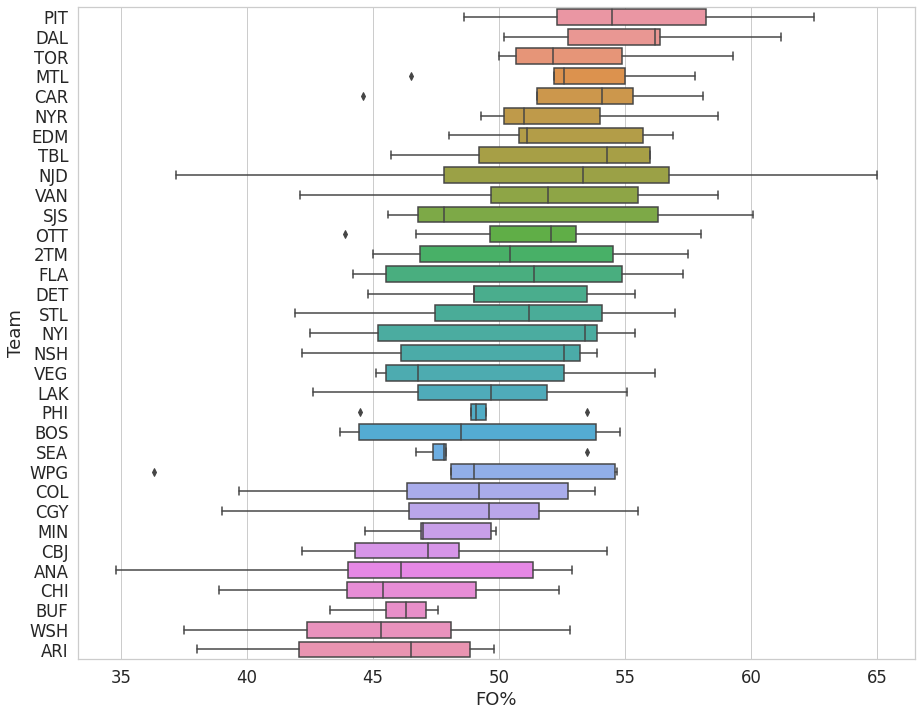

In [9]:
sns.set(rc={'figure.figsize':(15,12)}, font_scale=1.5, style='whitegrid')
order = fo_df.groupby(by=['Team'])['FO%'].mean().sort_values(ascending=False).index
sns.boxplot(y=fo_df['Team'], 
            x=fo_df['FO%'], 
            order=order)
plt.show()

# Even Strength 

Let's see who gets the biggest special teams boost by viewing the percentage of their power play points in respect to their total points

<AxesSubplot:xlabel='PTS', ylabel='Count'>

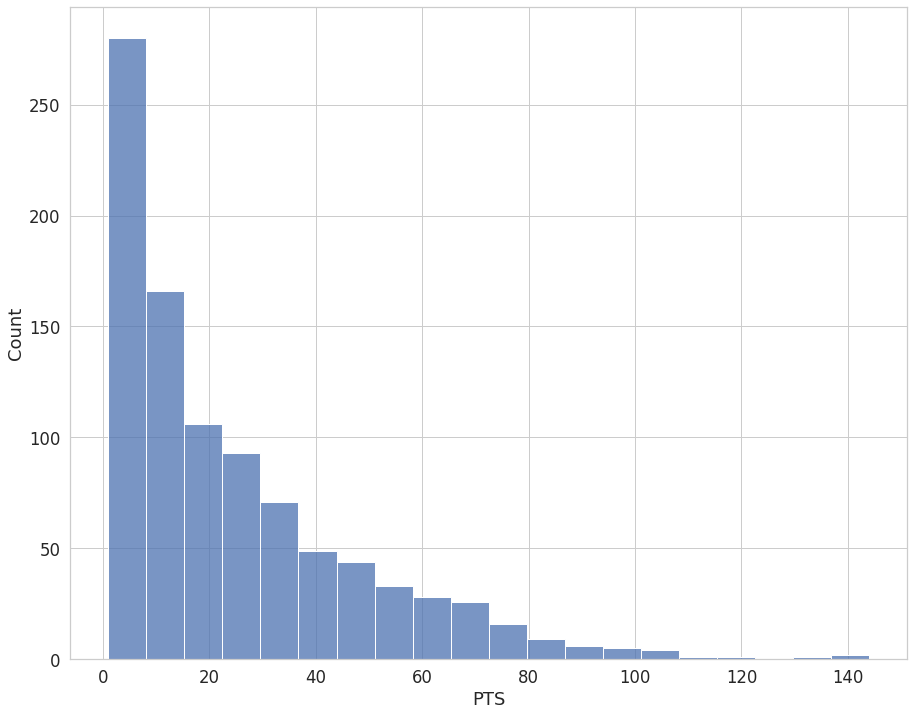

In [10]:
#Understanding distribution of PTS to arrive at a cut-off
df.PTS = pd.to_numeric(df.PTS)
sns.histplot(data=df[df.PTS != 0], x="PTS", bins=20)

In [11]:
pp_df = df[['Player','PTS','PPG','PP']]
pp_df[['PTS','PPG','PP']] = pp_df[['PTS','PPG','PP']].apply(pd.to_numeric)
pp_df = pp_df[pp_df.PTS >= 20]
pp_df['PPP'] = pp_df['PPG']+pp_df['PP']
pp_df['PP%'] = pp_df['PPP']/pp_df['PTS']
pp_df.sort_values(by='PP%', ascending=False)

/tmp/ipykernel_2048/2017517424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp_df[['PTS','PPG','PP']] = pp_df[['PTS','PPG','PP']].apply(pd.to_numeric)
/tmp/ipykernel_2048/2017517424.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp_df['PPP'] = pp_df['PPG']+pp_df['PP']
/tmp/ipykernel_2048/2017517424.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

,Player,PTS,PPG,PP,PPP,PP%
148,Luke Hughes,47.0,4.0,21.0,25.0,0.531915
78,Mats Zuccarello,63.0,5.0,28.0,33.0,0.523810
104,Shayne Gostisbehere,56.0,2.0,27.0,29.0,0.517857
281,Tyler Johnson,31.0,8.0,8.0,16.0,0.516129
260,Brandon Montour,33.0,1.0,16.0,17.0,0.515152
25,Steven Stamkos,81.0,19.0,20.0,39.0,0.481481
349,Andrei Kuzmenko,25.0,5.0,7.0,12.0,0.480000
398,Max Pacioretty,23.0,2.0,9.0,11.0,0.478261
171,Brent Burns,43.0,4.0,16.0,20.0,0.465116
201,Cam Fowler,39.0,2.0,16.0,18.0,0.461538


<Figure size 1224x576 with 0 Axes>

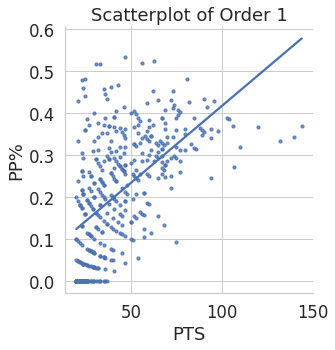

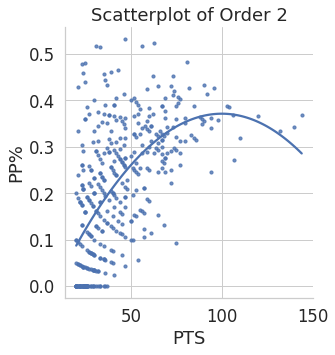

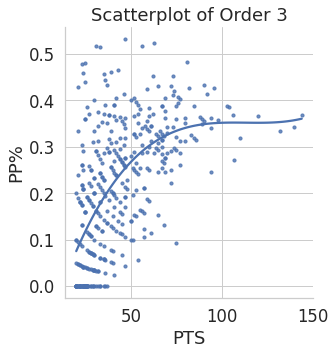

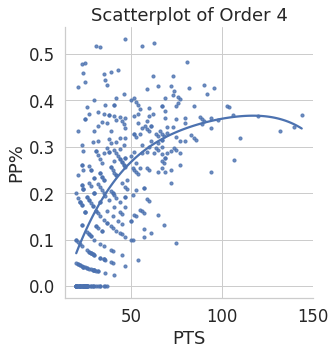

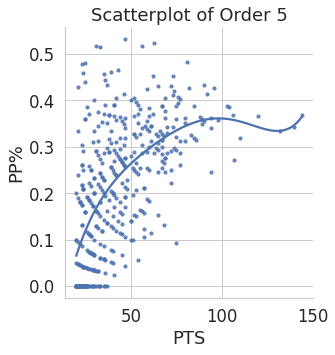

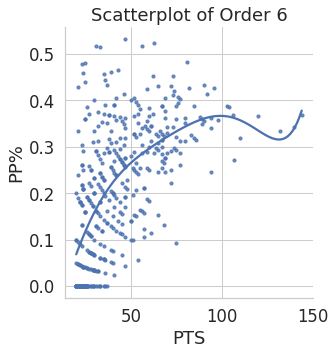

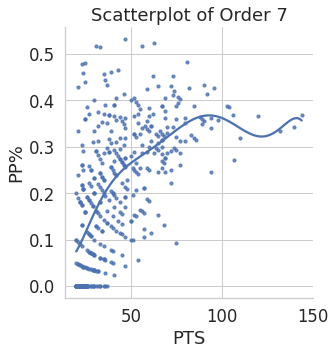

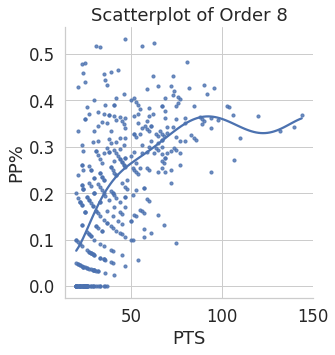

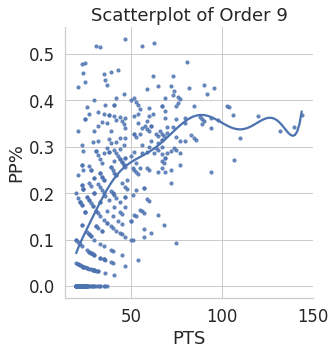

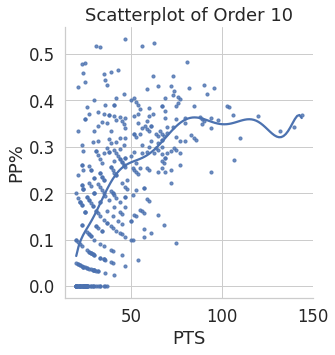

In [12]:
plt.figure(1 , figsize = (17 , 8))
n = 0 
for y in [1,2,3,4,5,6,7,8,9,10]:
    n += 1
    sns.lmplot(data=pp_df, x="PTS", y="PP%", order=y, ci=None, scatter_kws={"s": 10})
    plt.title('Scatterplot of Order {}'.format(y))
plt.show()

It's a polynomial line of best fit, so typically players with higher point totals will have a higher percentage of their points coming from the powerplay, probably as they get put on their team's respective PP1 and PP2; but the PP% seems to taper off as players surpass the 50 point mark (maybe because there is only so much you can get out of being on a high scoring PP1). There does seem to be a little uptick in the super high scorer category (McDavid, Kucherov, Mackinnon), probably as these players are more the drivers of power play goals on the team and score the majority of the PP points for the team.